In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
# 波士顿房价回归数据集
boston = load_boston()

In [3]:
# 划分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, test_size=0.1, random_state=0)
clf = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4, min_samples_split=2, loss='ls')
clf.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

GBDT回归MSE： 24.99183448354118
各特征的重要程度： [2.94256419e-02 9.73258504e-05 3.17369484e-03 3.20343472e-04
 3.17655515e-02 4.87832483e-01 1.04813536e-02 3.75382798e-02
 3.64746982e-03 1.71945023e-02 2.86699654e-02 1.13371696e-02
 3.38516219e-01]


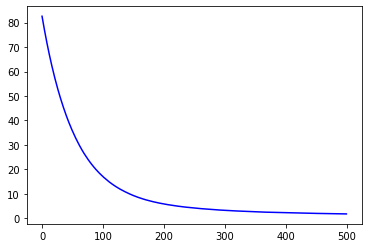

In [4]:
print('GBDT回归MSE：',mean_squared_error(Y_test, clf.predict(X_test)))
#print('每次训练的得分记录：',clf.train_score_)
print('各特征的重要程度：',clf.feature_importances_)
# 每次训练，增加新的CART树，带来的训练得分变化
# train_score_:表示在样本集上每次迭代以后的对应的损失函数值。
plt.plot(np.arange(500), clf.train_score_, 'b-')  
#print(clf.train_score_)
plt.show()